In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.2)

## Problema 1

<font size=3px>Uma pessoa na beira de um um poço lança uma bola para cima com velocidade
inicial $v_0$. Após subir verticalmente a bola cai no fundo do poço, que possui profundidade
$H$. Assuma que a bola foi lançada de uma altura $h$ a partir da beira do poço.<br>
a) Determine a posição da bola em um instante qualquer $t$ (após seu lançamento).<br>
b) Em que instante a bola atinge o fundo do poço?<br>
Assuma que a aceleração da gravidade é (em módulo) $g = 9,8$ m/s$^2$.
</font>

In [2]:
#Definir variaveis/parametros:
x0,v0,a,t0,t,g,h,H = sp.symbols('x_0,v_0,a,t_0,t,g,h,H')

In [3]:
#Trajetoria da bola:
a = -g #Orientando o eixo x para cima!
x0 = h #Colocando a origem na beira do poço
t0 = 0 #Iniciando o tempo no lançamento da bola
x = lambda t: x0 + v0*(t-t0)  + a*((t-t0)**2)/2
x(t)

-g*t**2/2 + h + t*v_0

In [4]:
#Determinar o momento que a bola atinge o fundo do poço: x(t) = -H:
tsol = sp.solve(sp.Eq(x(t),-H),t)
print('soluções:')
display(tsol[0]),display(tsol[1])

soluções:


(v_0 - sqrt(2*H*g + 2*g*h + v_0**2))/g

(v_0 + sqrt(2*H*g + 2*g*h + v_0**2))/g

(None, None)

In [5]:
#Definindo as constantes:
pars = {g : 9.8, h : 1.5, H : 3., v0 : 5.}

In [6]:
#Soluções numéricas
print('soluções:')
display(tsol[0].subs(pars),tsol[1].subs(pars))

soluções:


-0.575464169654725

1.59587233292003

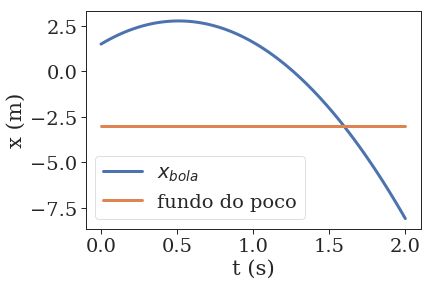

In [7]:
#Plot das trajetória
fig = plt.figure()

#Obter equações numéricas:
xf = sp.lambdify(t,x(t).subs(pars))

tpts = np.linspace(0.,2.,100)
plt.plot(tpts,xf(tpts),linewidth=3,label=r'$x_{bola}$')
plt.plot(tpts,[-H.subs(pars).evalf()]*tpts.size,linewidth=3,label='fundo do poco')
plt.xlabel(r't (s)')
plt.ylabel(r'x (m)')
leg = plt.legend()
plt.show()

## Problema 2

<font size=3px>Um motorista dirigindo com uma velocidade constante de 45,0 m/s passa sem perceber por um bloqueio da polícia.<br>
Um segundo após a passagem do carro, a polícia sai em perseguição a ele,com uma aceleração constante de 3,00 m/s$^2$. <br>
Depois de quanto tempo o policial alcança o carro perseguido?</font>

In [8]:
#Definir variaveis/parametros:
xC0,vC0,aC,tC0,tP0,xP0,vP0,aP,t = sp.symbols('x_0^C,v_0^C,a^C,t_0^C,t_0^P,x_0^P,v_0^P,a^P,t')

In [9]:
#Trajetoria do carro:
xC = lambda t: xC0 + vC0*(t-tC0)  + aC*((t-tC0)**2)/2
xC(t)

a^C*(t - t_0^C)**2/2 + v_0^C*(t - t_0^C) + x_0^C

In [10]:
#Trajetoria do carro de polícia:
xP = lambda tt: xP0 + vP0*(t-tP0)  + aP*((t-tP0)**2)/2
xP(t)

a^P*(t - t_0^P)**2/2 + v_0^P*(t - t_0^P) + x_0^P

In [11]:
#Definindo as constantes:
tC0 = 0. #comecamos a marcar o tempo quando o carro passa pela polícia
xC0 = 0. #colocamos a origem no ponto em que o carro passa pela polícia
vC0 = 45. #velocidade inicial do carro (constante)
aC = 0. #aceleração do carro (nula)
tP0 = 1. #o movimento da polícia começa no instante = 1s
xP0 = 0. #posição inicial da policia
vP0 = 0. #velocidade inicial da polícia
aP = 3. #aceleracao da policia

In [12]:
#Trajetória do carro:
xC(t)

45.0*t

In [13]:
#Trajetória da polícia:
xP(t)

1.5*(t - 1.0)**2

In [14]:
#Momento em que os carros se encontram:
tsols = sp.solve(sp.Eq(xC(t),xP(t)),t)
print('solucoes: t = ',tsols)
#(Note que o movimento do carro da polícia só é válido para t> 1, portanto devemos tomar a maior soluçao)

solucoes: t =  [0.0312805773286880, 31.9687194226713]


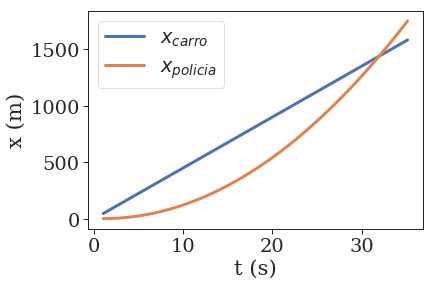

In [15]:
#Plot das trajetórias
fig = plt.figure()

#Obter equações numéricas:
xCf = sp.lambdify(t,xC(t))
xPf = sp.lambdify(t,xP(t))

tpts = np.linspace(tP0,1.1*float(max(tsols)),100)
plt.plot(tpts,xCf(tpts),linewidth=3)
plt.plot(tpts,xPf(tpts),linewidth=3)
plt.xlabel(r't (s)')
plt.ylabel(r'x (m)')
leg = plt.legend([r'$x_{carro}$',r'$x_{policia}$'])
plt.show()

## Problema 3

<font size=3px>Um projétil é atirado em direção a um plano inclinado como mostra figura abaixo. A velocidade inicial tem módulo $v_i$ e faz um ângulo $\theta_i$ com a horizontal. O plano possui inclinação
$\phi$ e a aceleração da gravidade tem módulo $g$. Mostre que o projétil percorre uma distância $d$
ao longo do plano inclinado dada por:<br><br>
$$
d = \frac{2 v_i^2 \cos \theta_i \sin (\theta_i -\phi)}{g \cos^2 \phi}
$$
</font>
<img src="FS_01.png" alt="Drawing" style="width: 400px;"/>

Resposta= 3.48 m


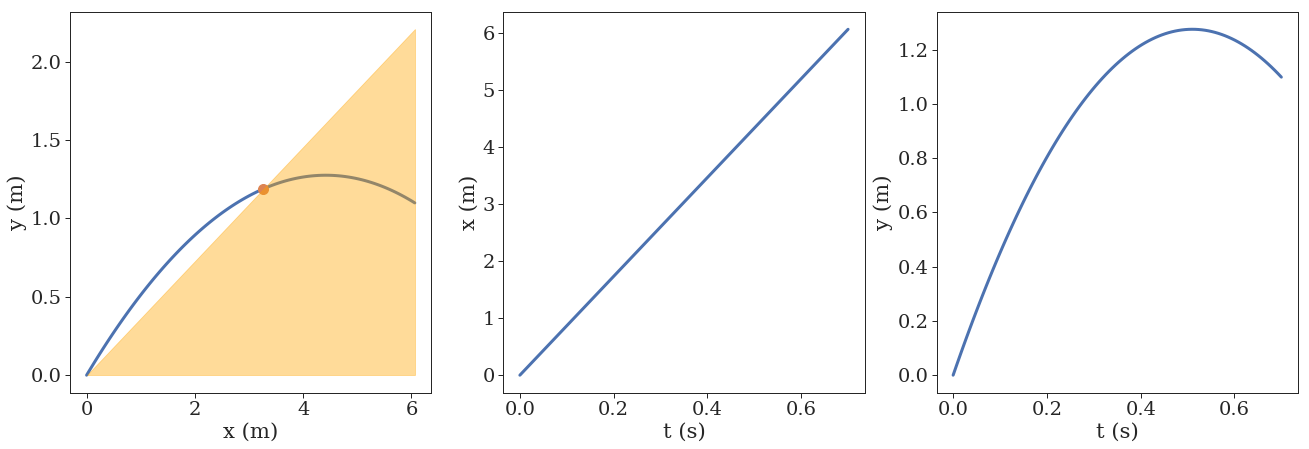

In [16]:
fig = plt.figure(figsize=(22,7))
thetai = 30.*np.pi/180.
vi = 10.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,0.
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.

phi = 20.*np.pi/180.
lF = lambda x: x*np.tan(phi)

d = (2*vi**2*np.cos(thetai)*np.sin(thetai-phi)/(g*(np.cos(phi)**2)))
xd = d*np.cos(phi)
yd = d*np.sin(phi)

tpts = np.linspace(0.,0.7,100)
ax1 = plt.subplot(131)
ax1.plot(xF(tpts),yF(tpts),linewidth=3)
ax1.fill([xF(tpts).min(),xF(tpts).max(),xF(tpts).max()],
         [lF(xF(tpts).min()),lF(xF(tpts).min()),lF(xF(tpts).max())],zorder=10,alpha=0.4,c='orange')
ax1.plot(xd,yd,'o',markersize=10)
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax2 = plt.subplot(132)
ax2.plot(tpts,xF(tpts),linewidth=3)
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
ax3.plot(tpts,yF(tpts),linewidth=3)
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
print('Resposta= %.2f m' %d)

### Problema 3

<font size=3px>
Uma bola é arremessada com velocidade inicial $v_i = 30,0$ m/s com um ângulo de $45^{\circ}$ com relação à horizontal. 
A bola está a 1,2 m acima do solo no momento do arremesso e existe um muro de 10 m de altura à uma distância de 80 m do arremessador.
<br> a) Determine o vetor velocidade inicial ($\vec{v}_i$)
<br> b) Determine o alcance horizontal da bola.
<br> c) A bola consegue passar por cima do muro?
<br> d) Assumindo que o ângulo de arremesso não se altera, qual a velocidade mínima para que a bola caia do outro lado do muro?
</font>

In [17]:
fig = plt.figure(figsize=(22,7))
thetai = 45.*np.pi/180.
vi = 30.
v0x = vi*np.cos(thetai)
v0y = vi*np.sin(thetai)
t0,x0,y0 = 0.,0.,1.2
g = 9.8
xF = lambda t: x0 + v0x*(t-t0)
yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
tmin,tmax = t0,5.
tpts = np.linspace(tmin,tmax,100)
dt = 0.1

ax1 = plt.subplot(131)
line1, = ax1.plot(xF(tpts),yF(tpts),'--',linewidth=3)
ax1.plot([80.,80.],[0.,10.],linewidth=5)
ax1.set_xlabel(r'x (m)')
ax1.set_ylabel(r'y (m)')
ax1.set_ylim(0.,yF(tpts).max()*1.1)
text = ax1.text(1., yF(tpts).max(), r'$v_i = %1.2f$ m/s' %vi)
ax2 = plt.subplot(132)
line2, = ax2.plot(tpts,xF(tpts),'--',linewidth=3)
ax2.set_xlabel(r't (s)')
ax2.set_ylabel(r'x (m)')
ax3 = plt.subplot(133)
line3, = ax3.plot(tpts,yF(tpts),'--',linewidth=3)
ax3.set_xlabel(r't (s)')
ax3.set_ylabel(r'y (m)')
ax3.set_ylim(0.,yF(tpts).max()*1.1)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


def init():
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)
def animate(i):
    vi = 30.-float(i)/30.
    v0x = vi*np.cos(thetai)
    v0y = vi*np.sin(thetai)
    xF = lambda t: x0 + v0x*(t-t0)
    yF = lambda t: y0 + v0y*(t-t0) - g*((t-t0)**2)/2.
    line1.set_data(xF(tpts),yF(tpts))
    line2.set_data(tpts,xF(tpts))
    line3.set_data(tpts,yF(tpts))
    text.set_text(r'$v_i = %1.2f$ m/s' %vi)
    return (line1,line2,line3,text)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int((tmax-tmin)/dt), interval=150, 
                               blit=True)
plt.close()
anim